In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

data = pd.read_csv("Dilemas_Morales_261124.csv")

# Filtros y procesamiento

In [158]:
# Asigna valores a Frecuencia de exposicion y Nivel de dominio
map1 = {"Nunca":0,"Casi nunca":1,"Ocasionalmente":2, "Casi diario":3, "Diariamente":4}
map2 = {"Nulo":0, "Principiante (A1-A2)":1, "Intermedio (B1-B2)":2, "Avanzado (C1-C2)":3, "Nativo":4}

# Asigna booleanos a Adquisicion y Uso de segundo idioma
map3 = {"Verdadero":True, "Falso":False}

# Asigna booleanos a dilemas morales. De acuerdo a distanciamiento emocional, utilitarias (True) y deontologicas (False)
map4_1 = {"Sí":True, "Yes":True, "No":False}
map4_2 = {"Sí":False, "Yes":False, "No":True}

In [159]:
# Reasigna nombres y aplica filtros

# Exposicion del idioma -----------------------------------------------------------------------------------------------------------------------------------------------------------------------
data["Frec_lec_rec"] = data["Indique la frecuencia con la que consume contenido principalmente en el idioma INGLÉS. [Lectura recreativa]"].map(map1)/5
data["Frec_Tvpeliculas"] = data["Indique la frecuencia con la que consume contenido principalmente en el idioma INGLÉS. [Series de TV o películas]"].map(map1)/5
data["Frec_LecAcademica"] = data["Indique la frecuencia con la que consume contenido principalmente en el idioma INGLÉS. [Lectura académica]"].map(map1)/5
data["Frec_RS"] = data["Indique la frecuencia con la que consume contenido principalmente en el idioma INGLÉS. [Redes sociales (Facebook, Instagram, TikTok, X, Podcast)]"].map(map1)/5
data["Frec_news"] = data["Indique la frecuencia con la que consume contenido principalmente en el idioma INGLÉS. [Periódicos o revistas digitales]"].map(map1)/5

# Dominio del idioma --------------------------------------------------------------------------------------------------------------------------------------------------------------------------
data["Listening"] = data["Indique el nivel de dominio que considere posee en el idioma inglés. [Comprensión verbal]"].map(map2)/5
data["Speaking"] = data["Indique el nivel de dominio que considere posee en el idioma inglés. [Expresión verbal]"].map(map2)/5
data["Writting"] = data["Indique el nivel de dominio que considere posee en el idioma inglés. [Expresión escrita]"].map(map2)/5
data["Reading"] = data["Indique el nivel de dominio que considere posee en el idioma inglés. [Comprensión lectora]"].map(map2)/5

# Adquisicion del idioma ----------------------------------------------------------------------------------------------------------------------------------------------------------------------
data["Español_legua_materna"] = data["Responda según sea su situación  [El español es su legua materna]"].map(map3)
data["Inglés_segundo_idioma"] = data["Responda según sea su situación  [El inglés es su segundo idioma]"].map(map3)
data["Adquisición_educativa"] = data["Responda según sea su situación  [Su adquisición del segundo idioma es o fue dentro de un entorno educativo]"].map(map3)
data["Inglés_en_extranjero"] = data["Responda según sea su situación  [Ha empleado el inglés para comunicarse en el extranjero]"].map(map3)
data["Certificación_inglés"] = data["Responda según sea su situación  [Ha presentado alguna certificación de inglés (TOEFL, IELTS, CAE, FCE)]"].map(map3)
data["Residencia_anglosajón+3"] = data["Responda según sea su situación  [Ha residido en algún país anglosajón más de 3 años]"].map(map3)

# personal dilemas -----------------------------------------------------------------------------------------------------------------------------------------------------------------------
data["ing_hab"] = data["Is it appropriate for you to take the train instead of the bus in order to ensure your not being late for your meeting?"].map(map4_1)
data["esp_hab"] = data["¿Sería apropiado que tomes el tren en lugar del autobús para asegurarte de no llegar tarde a tu reunión?"].map(map4_1)

data["ing_crying_baby"] = data["Is it appropriate for you to smother your child in order to save yourself and the other townspeople?"].map(map4_1)
data["esp_crying_baby"] = data["¿Sería apropiado que sofoques a tu hijo para salvarte a ti y a los otros habitantes del pueblo?"].map(map4_1)

data["ing_sophie"] = data["Should you bring one of your children to the laboratory in order to avoid having them both die?"].map(map4_1)
data["esp_sophie"] = data["¿Llevaría a uno de sus hijos al laboratorio para evitar que ambos mueran?"].map(map4_1)

# impersonal dilemmas -------------------------------------------------------------------------------------------------------------------------------------------------------------------------
data["ing_infiel"] = data["Would you tell your partner that you cheated on him/her/them?"].map(map4_2)
data["esp_infiel"] = data["¿Le dirías a tu pareja que le fuiste infiel?"].map(map4_2)

data["ing_delatar"] = data["Would you go to the police and tell them what you know?"].map(map4_2)
data["esp_delatar"] = data["¿Irías a la policía y les contarías lo que sabes?"].map(map4_2)

## Quita repetidos

In [160]:
# Elimina columnas duplicadas del df
processed_uno = data.drop(columns=[
    "Dirección de correo electrónico",
    "Marca temporal",
    "El siguiente estudio tiene como objetivo buscar diferencias en toma de las decisiones morales de las personas, entre su idioma nativo y su segundo idioma (Inglés). \r\nDe aceptar participar en el estudio, se le pedirá contestar algunas preguntas acerca de su adquisición y posesión del idioma; posteriormente, se le presentarán dilemas que le ayudarán a familiarizarse con la tarea, seguido de los dilemas morales que son parte de la prueba de investigación. \r\n\r\nSiéntase con absoluta libertad para preguntar sobre cualquier aspecto que le ayude a aclarar sus dudas.\r\nEl estudio abarca un tiempo aproximado de 15 minutos y NO recopilará datos personales.  \r\nUna vez concluido el cuestionario podrá consultar una copia de sus respuestas en el correo registrado.\r\n\r\nPara más detalles sobre el consentimiento informado puede consultar el link en la parte superior.",
    "Apellidos:",
    "Nombre(s):",
    "Fecha:",
    "Hora:",
    "Indique la frecuencia con la que consume contenido principalmente en el idioma INGLÉS. [Lectura recreativa]",
    "Indique la frecuencia con la que consume contenido principalmente en el idioma INGLÉS. [Series de TV o películas]",
    "Indique la frecuencia con la que consume contenido principalmente en el idioma INGLÉS. [Lectura académica]",
    "Indique la frecuencia con la que consume contenido principalmente en el idioma INGLÉS. [Redes sociales (Facebook, Instagram, TikTok, X, Podcast)]",
    "Indique la frecuencia con la que consume contenido principalmente en el idioma INGLÉS. [Periódicos o revistas digitales]",
    "Indique el nivel de dominio que considere posee en el idioma inglés. [Comprensión verbal]",
    "Indique el nivel de dominio que considere posee en el idioma inglés. [Expresión verbal]",
    "Indique el nivel de dominio que considere posee en el idioma inglés. [Expresión escrita]",
    "Indique el nivel de dominio que considere posee en el idioma inglés. [Comprensión lectora]",
    "Responda según sea su situación  [El español es su legua materna]",
    "Responda según sea su situación  [El inglés es su segundo idioma]",
    "Responda según sea su situación  [Su adquisición del segundo idioma es o fue dentro de un entorno educativo]",
    "Responda según sea su situación  [Ha empleado el inglés para comunicarse en el extranjero]",
    "Responda según sea su situación  [Ha presentado alguna certificación de inglés (TOEFL, IELTS, CAE, FCE)]",
    "Responda según sea su situación  [Ha residido en algún país anglosajón más de 3 años]",
    "Is it appropriate for you to take the train instead of the bus in order to ensure your not being late for your meeting?",
    "¿Sería apropiado que tomes el tren en lugar del autobús para asegurarte de no llegar tarde a tu reunión?",
    "Is it appropriate for you to smother your child in order to save yourself and the other townspeople?",
    "¿Sería apropiado que sofoques a tu hijo para salvarte a ti y a los otros habitantes del pueblo?",
    "Should you bring one of your children to the laboratory in order to avoid having them both die?",
    "¿Llevaría a uno de sus hijos al laboratorio para evitar que ambos mueran?",
    "Would you tell your partner that you cheated on him/her/them?",
    "¿Le dirías a tu pareja que le fuiste infiel?",
    "Would you go to the police and tell them what you know?",
    "¿Irías a la policía y les contarías lo que sabes?"
], axis=1)

#print(len(data.columns))
#print(len(processed_uno.columns))
#processed_uno.transpose()

## Dummies

In [161]:
df = pd.get_dummies(data=processed_uno, columns=["Su adquisición del segundo idioma es o fue: ", "Su principal exposición al inglés (de forma escrita, verbal o auditiva) ha sido:"])
#display(df.transpose())

## Califica Mini-test

In [162]:
# Puntuacion mini-test
tdf = df[["Are the sentences true or false? [Most jobs seem as if they can be done by robots or computers.]", "Are the sentences true or false? [Robots are always better at diagnosing illness than doctors.]", "Are the sentences true or false? [Many experts agree robots will replace teachers by 2027.]", "Are the sentences true or false? [One advantage of robot teachers is that they don't need to rest.]", "Are the sentences true or false? [Robot assistants could help teachers by marking homework.]", "Are the sentences true or false? [Some teachers use robots to reduce their time answering emails and marking homework.]"]].transpose()

correct_ans = [False, False, False, True, True, False]
puntuacion = []

for pregunta in tdf.columns:                               # Sujeto 1, 2, 3, 4...
    pt=0
    for index in range(len(correct_ans)):                        # Index de la respuesta
        if tdf[pregunta][index]==correct_ans[index]:
            #print("correct_ans")
            pt+=1
    puntuacion.append(pt/6)
    pt=0
df["Mini-test"] = puntuacion

<ipython-input-162-a3e3f1e90222>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if tdf[pregunta][index]==correct_ans[index]:


In [163]:
# Elimina repetidas mini test
df = df.drop(columns=["Are the sentences true or false? [Most jobs seem as if they can be done by robots or computers.]", "Are the sentences true or false? [Robots are always better at diagnosing illness than doctors.]", "Are the sentences true or false? [Many experts agree robots will replace teachers by 2027.]", "Are the sentences true or false? [One advantage of robot teachers is that they don't need to rest.]", "Are the sentences true or false? [Robot assistants could help teachers by marking homework.]", "Are the sentences true or false? [Some teachers use robots to reduce their time answering emails and marking homework.]"])

## Divide por idiomas

In [164]:
df["Encuesta_ingles"] = df["Seleccione cualquier opción:"]=="enallt"
df = df.drop(columns=["Seleccione cualquier opción:"])

df["Promedio"] = (df['Frec_lec_rec']/5 + df['Frec_Tvpeliculas']/5 + df['Frec_LecAcademica']/5 + df['Frec_RS']/5 + df['Frec_news']/5)

In [165]:
ingdf = df[df["Encuesta_ingles"]==True]
espdf = df[df["Encuesta_ingles"]==False]

## Total respuestas utilitarias

In [166]:
ingdf = ingdf.transpose()
lista = []
for i in ingdf.columns:
    count = 0

    for j in ["ing_hab", "esp_hab", "ing_crying_baby", "esp_crying_baby", "ing_sophie", "esp_sophie", "ing_infiel", "esp_infiel", "ing_delatar", "esp_delatar"]:
        #print(ingdf[i][j])
        if ingdf[i][j]==True:
            count+=1
    lista.append(count/5)

ingdf = ingdf.transpose()
ingdf["Ut_ans"] = lista

espdf = espdf.transpose()
lista = []
for i in espdf.columns:
    count = 0

    for j in ["ing_hab", "esp_hab", "ing_crying_baby", "esp_crying_baby", "ing_sophie", "esp_sophie", "ing_infiel", "esp_infiel", "ing_delatar", "esp_delatar"]:
        #print(espdf[i][j])
        if espdf[i][j]==True:
            count+=1
    lista.append(count/5)

espdf = espdf.transpose()
espdf["Ut_ans"] = lista

df["Ut_ans"] = ingdf["Ut_ans"]
df["Ut_ans"].fillna(espdf["Ut_ans"], inplace=True)

<ipython-input-166-fdfb03deb429>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Ut_ans"].fillna(espdf["Ut_ans"], inplace=True)


## ¿La persona es Utilitaria?

In [167]:
l = []
for i in ingdf["Ut_ans"]:
    if i >=0.5:
        a = 1
    else:
        a = 0
    l.append(a)
ingdf["P_Uti"] = l
l = []
for i in espdf["Ut_ans"]:
    if i >=0.5:
        a = 1
    else:
        a = 0
    l.append(a)
espdf["P_Uti"] = l
df["P_Uti"] = ingdf["P_Uti"]
df["P_Uti"].fillna(espdf["P_Uti"], inplace=True)

<ipython-input-167-3021b4fbbce9>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["P_Uti"].fillna(espdf["P_Uti"], inplace=True)


# Graficas

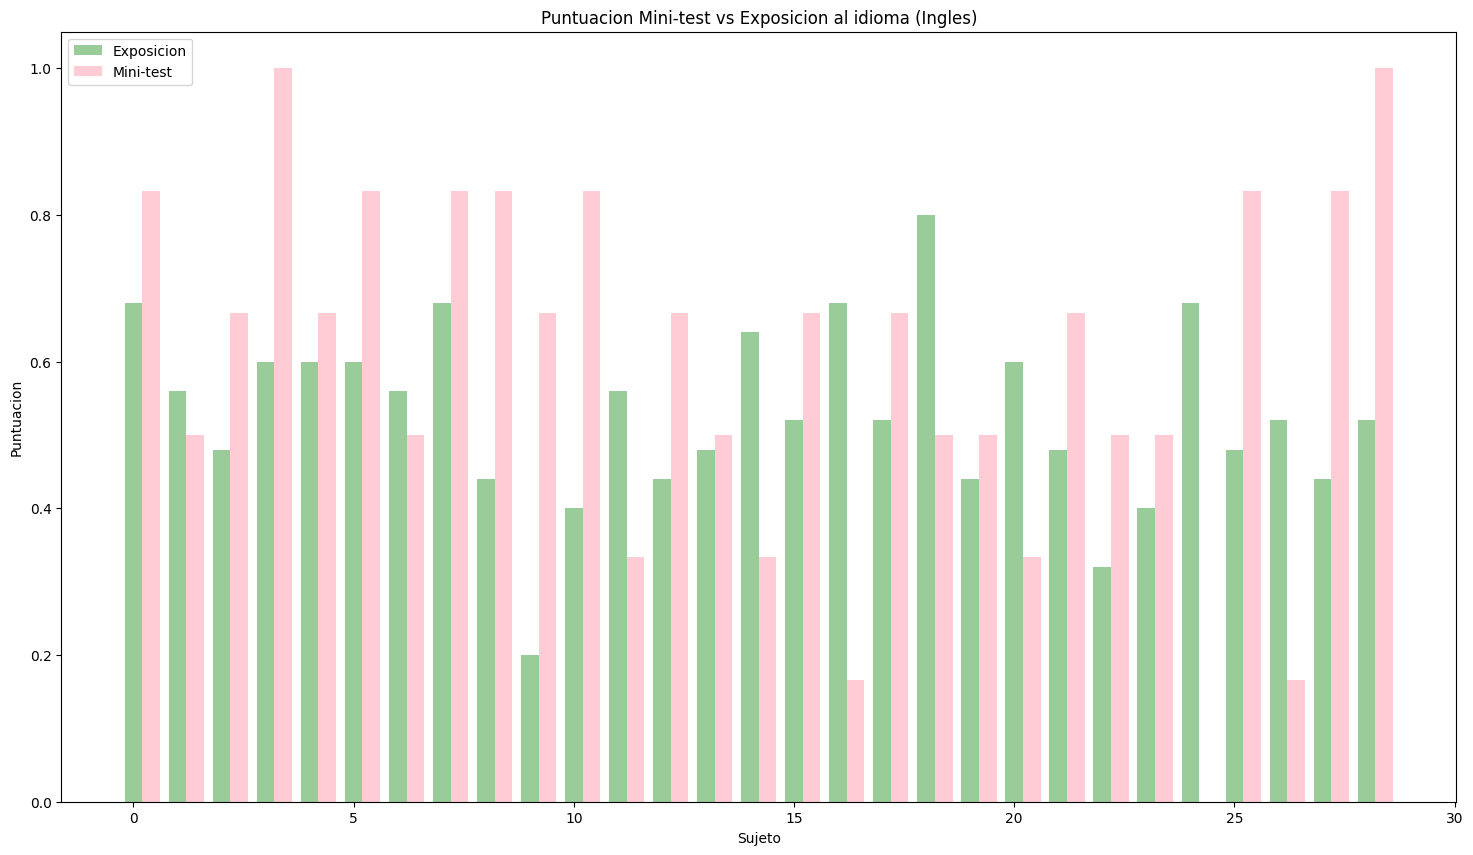

In [168]:
w = 0.4
x = range(len(ingdf['Adquisición_educativa']))

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

fig, ax = plt.subplots(figsize=(18, 10))
plt.bar(bar1, list(ingdf['Promedio']), w, label="Exposicion", color="green", alpha=0.4)
plt.bar(bar2, list(ingdf['Mini-test']), w, label="Mini-test", color="pink", alpha=0.8)

plt.title("Puntuacion Mini-test vs Exposicion al idioma (Ingles)")
plt.legend()
plt.xlabel("Sujeto")
plt.ylabel("Puntuacion")
plt.show()

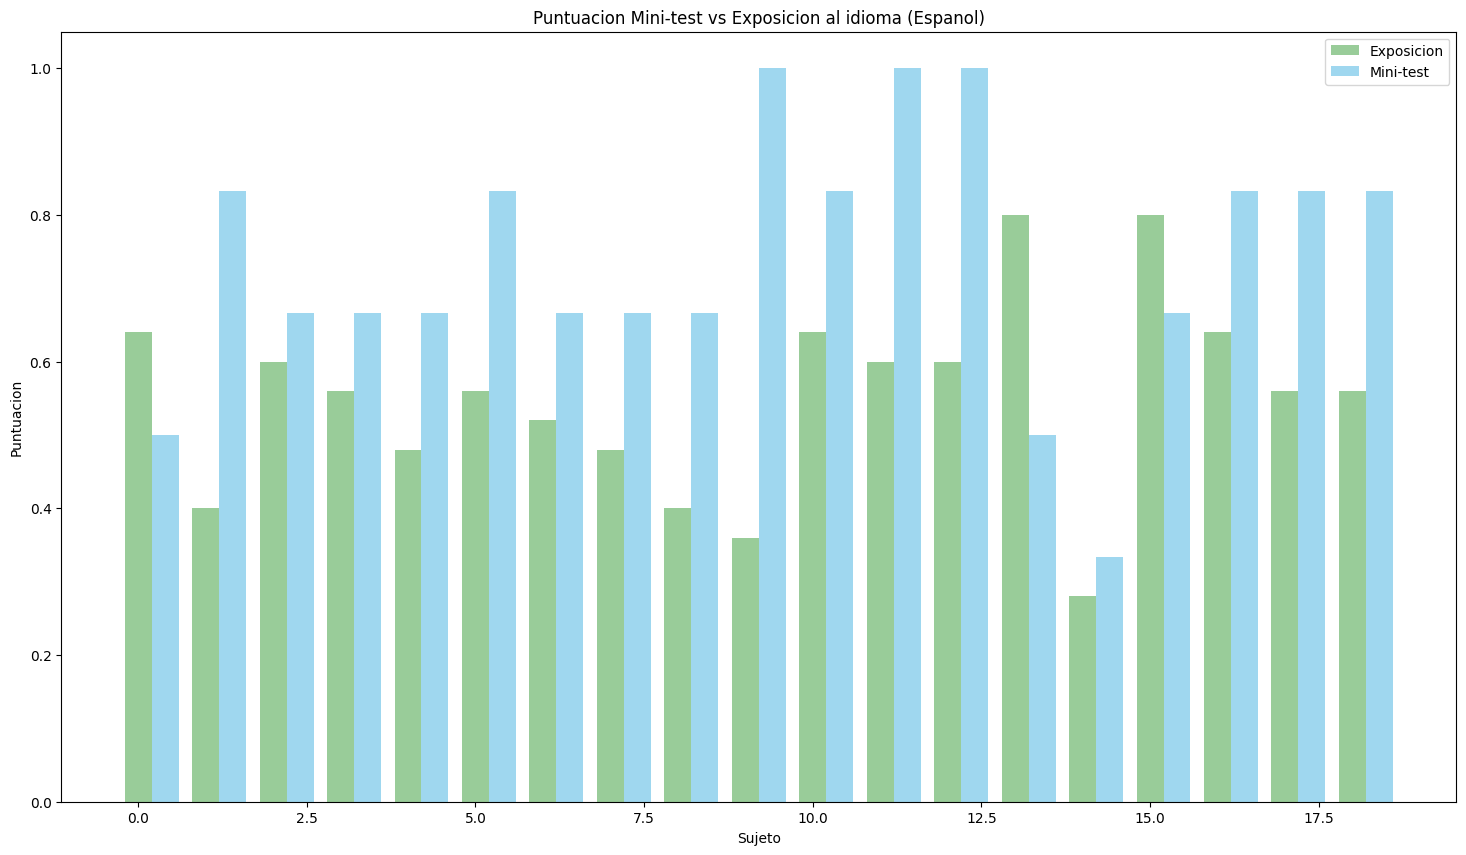

In [ ]:
w = 0.4
x = range(len(espdf['Adquisición_educativa']))

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

fig, ax = plt.subplots(figsize=(18, 10))
plt.bar(bar1, list(espdf['Promedio']), w, label="Exposicion", color="green", alpha=0.4)
plt.bar(bar2, list(espdf['Mini-test']), w, label="Mini-test", color="skyblue",alpha=.8 )
plt.title("Puntuacion Mini-test vs Exposicion al idioma (Español)")
plt.legend()
plt.xlabel("Sujeto")
plt.ylabel("Puntuacion")
plt.show()

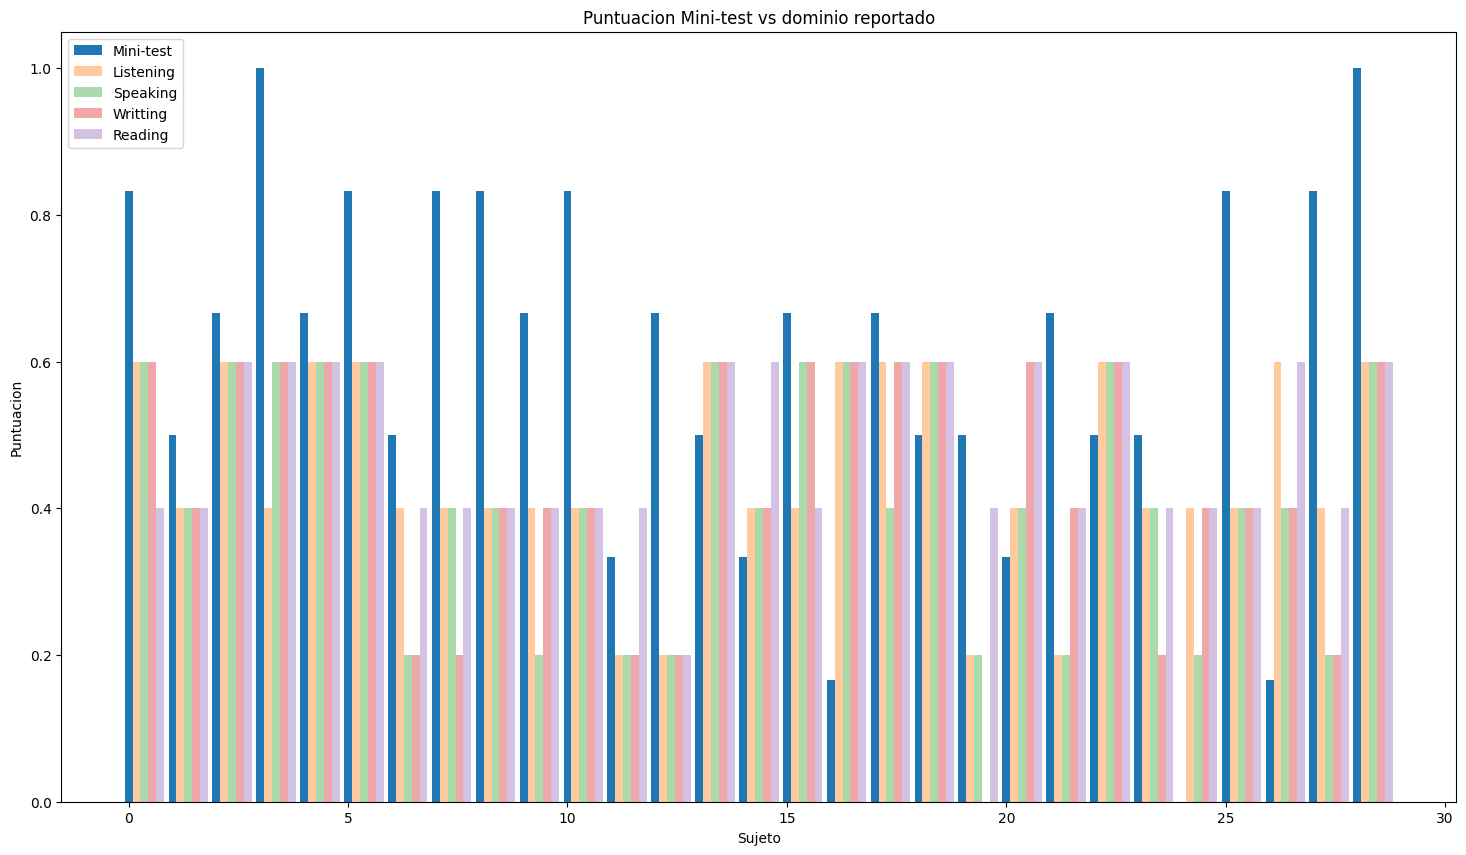

In [170]:
w = 0.18
x = range(len(ingdf['Adquisición_educativa']))


bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]
bar4 = [i+w for i in bar3]
bar5 = [i+w for i in bar4]

fig, ax = plt.subplots(figsize=(18, 10))
plt.bar(bar1, list(ingdf['Mini-test']), w, label="Mini-test")
plt.bar(bar2, list(ingdf['Listening']), w, label="Listening", alpha=0.4)
plt.bar(bar3, list(ingdf['Speaking']), w, label="Speaking", alpha=0.4)
plt.bar(bar4, list(ingdf['Writting']), w, label="Writting", alpha=0.4)
plt.bar(bar5, list(ingdf['Reading']), w, label="Reading", alpha=0.4)

plt.title("Puntuacion Mini-test vs dominio reportado")
plt.legend()
plt.xlabel("Sujeto")
plt.ylabel("Puntuacion")
plt.show()

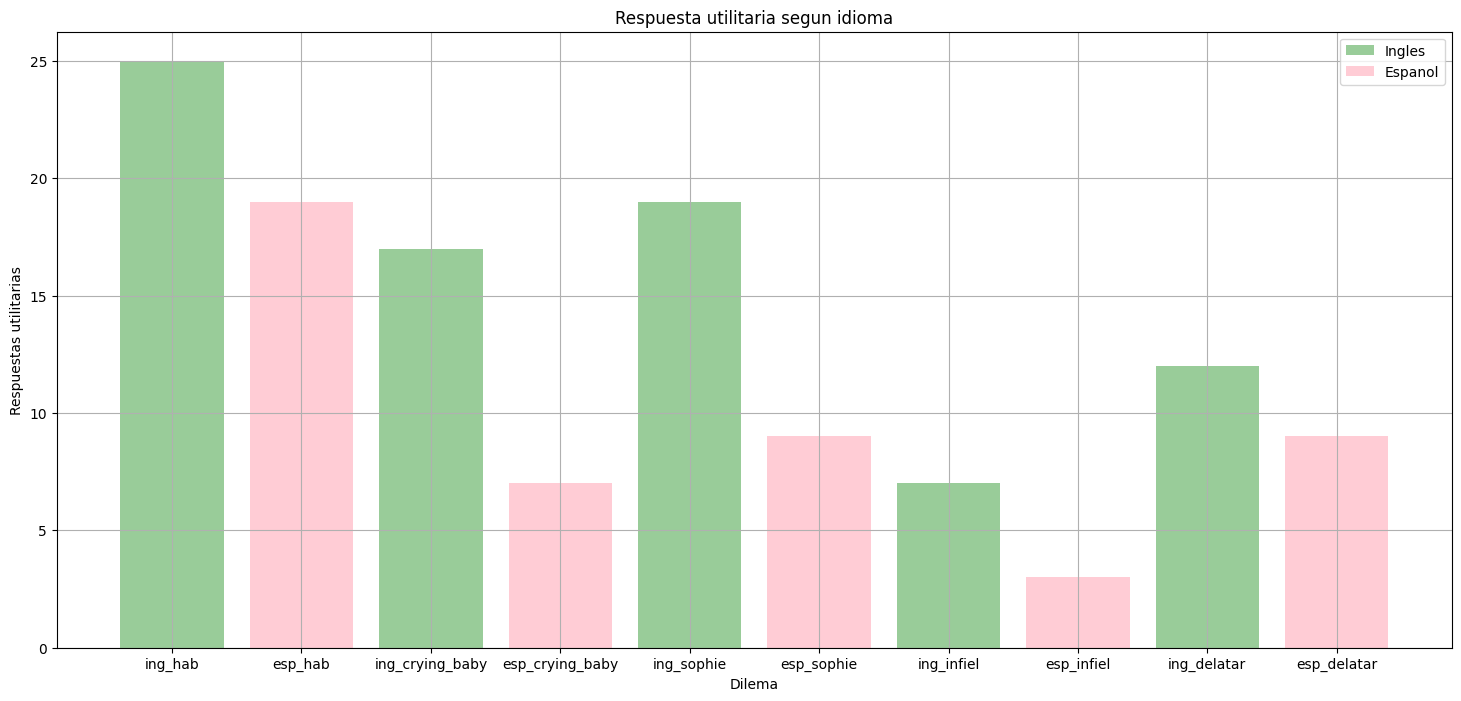

In [174]:
# Respuestas utilitarias por idioma

ing_util = {}
for i in ['ing_hab', 'esp_hab', 'ing_crying_baby', 'esp_crying_baby', 'ing_sophie', 'esp_sophie', 'ing_infiel', 'esp_infiel', 'ing_delatar', 'esp_delatar']:
    ing_util[i]=(list(ingdf[i]).count(True))

esp_util = {}
for i in ['ing_hab', 'esp_hab', 'ing_crying_baby', 'esp_crying_baby', 'ing_sophie', 'esp_sophie', 'ing_infiel', 'esp_infiel', 'ing_delatar', 'esp_delatar']:
    esp_util[i]=(list(espdf[i]).count(True))

fig, ax = plt.subplots(figsize=(18, 8))
ax.grid()
plt.bar(ing_util.keys(), ing_util.values(), label="Ingles", color="green", alpha=0.4)
plt.bar(esp_util.keys(), esp_util.values(), label="Espanol", color="pink", alpha=0.8)
plt.title("Respuesta utilitaria segun idioma")
plt.legend()
plt.xlabel("Dilema")
plt.ylabel("Respuestas utilitarias")
plt.show()

## Respuestas utilitarias vs Mini-test

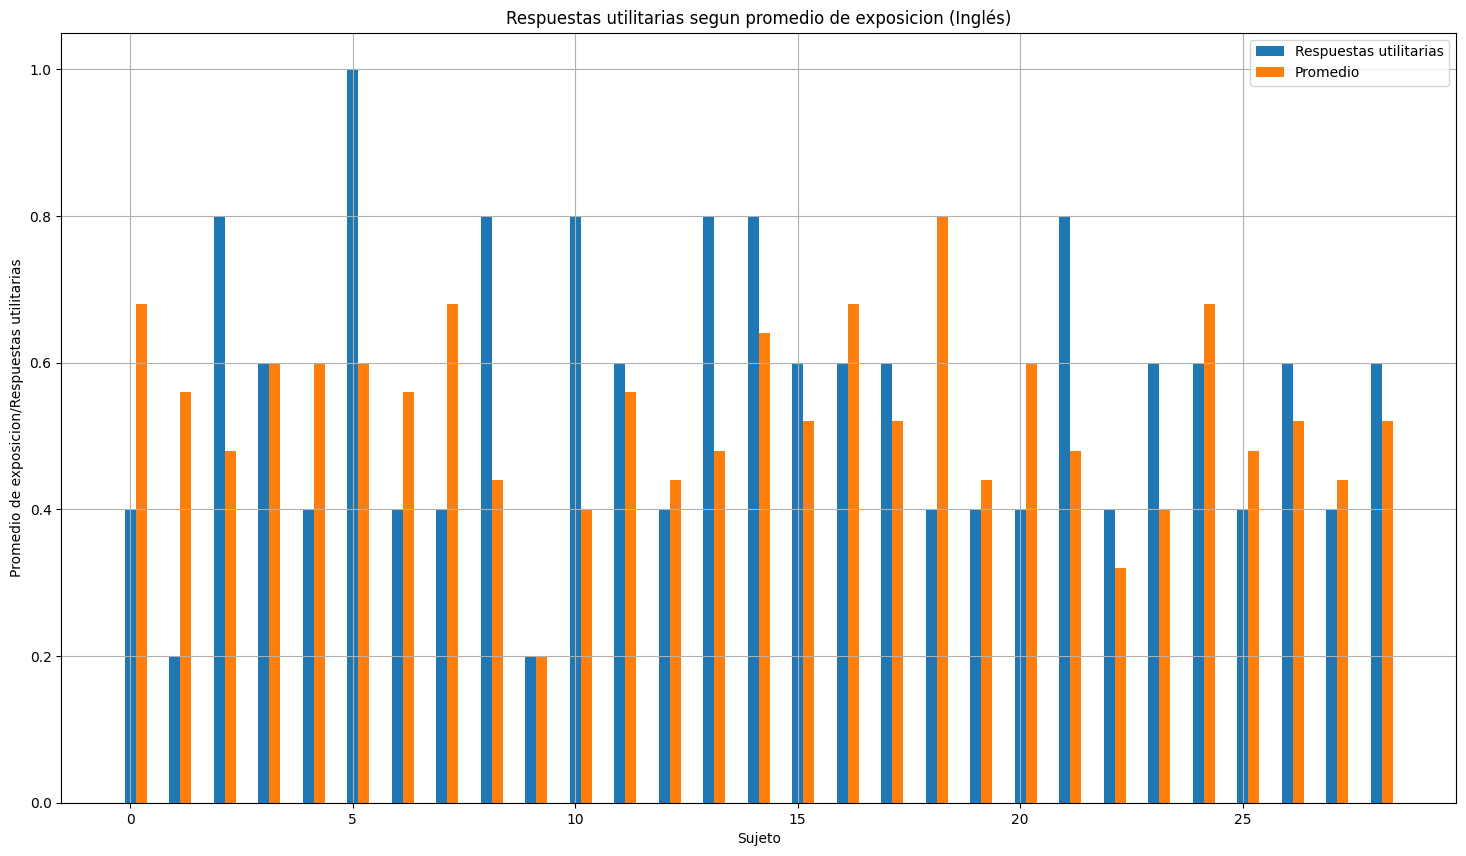

In [175]:
w = 0.25
x = range(len(ingdf['Adquisición_educativa']))

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

fig, ax = plt.subplots(figsize=(18, 10))
ax.grid()
plt.bar(bar1, list(ingdf['Ut_ans']), w, label="Respuestas utilitarias")
plt.bar(bar2, list(ingdf['Promedio']), w, label="Promedio")
plt.legend()
plt.title("Respuestas utilitarias segun promedio de exposicion (Inglés)")
plt.xlabel("Sujeto")
plt.ylabel("Promedio de exposicion/Respuestas utilitarias")
plt.show()

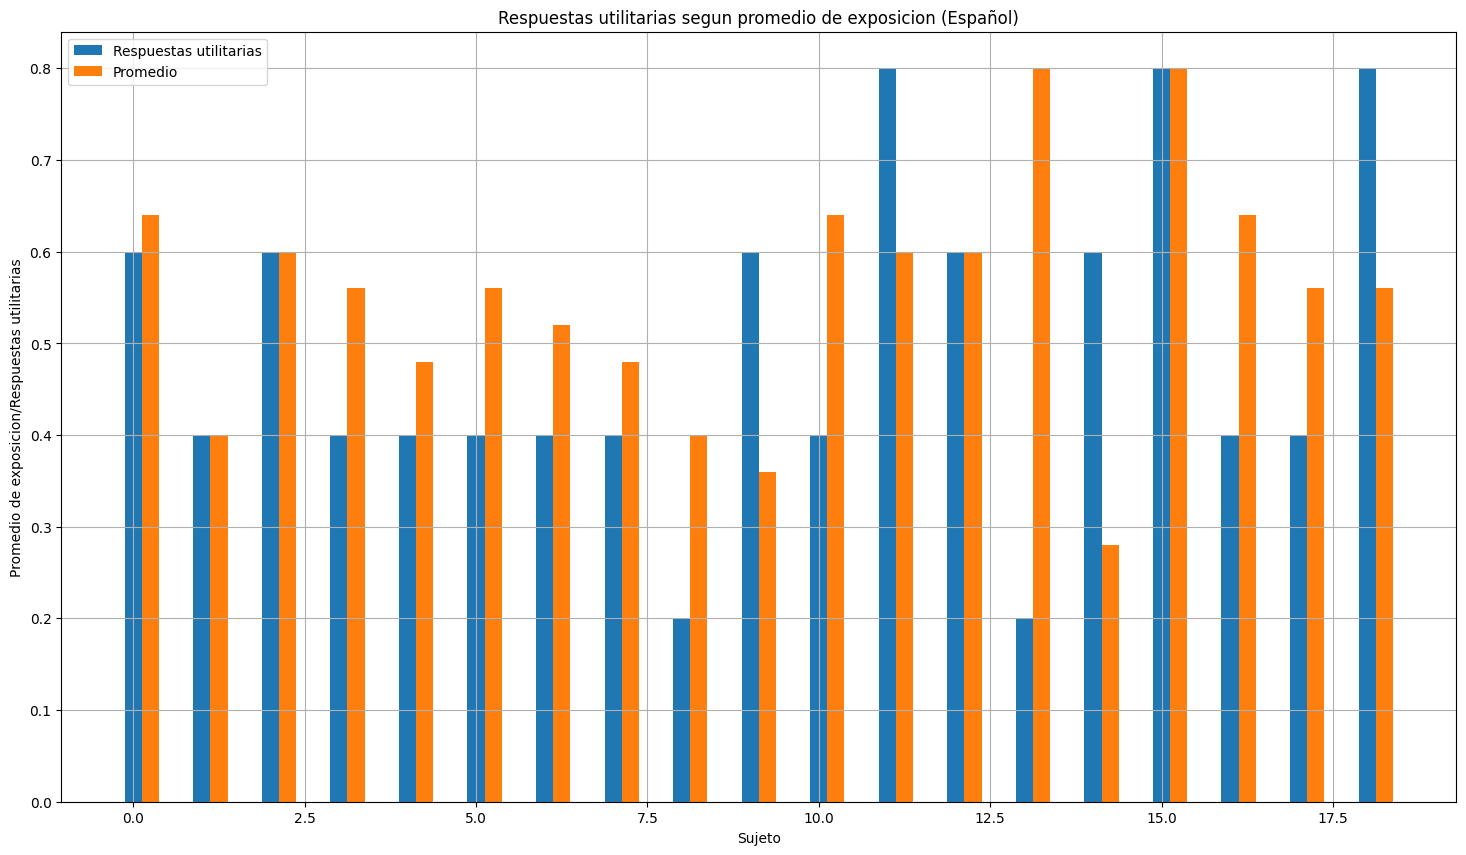

In [176]:
w = 0.25
x = range(len(espdf['Adquisición_educativa']))

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

fig, ax = plt.subplots(figsize=(18, 10))
ax.grid()
plt.bar(bar1, list(espdf['Ut_ans']), w, label="Respuestas utilitarias")
plt.bar(bar2, list(espdf['Promedio']), w, label="Promedio")
plt.legend()
plt.title("Respuestas utilitarias segun promedio de exposicion (Español)")
plt.xlabel("Sujeto")
plt.ylabel("Promedio de exposicion/Respuestas utilitarias")
plt.show()

## Graficas de pastel

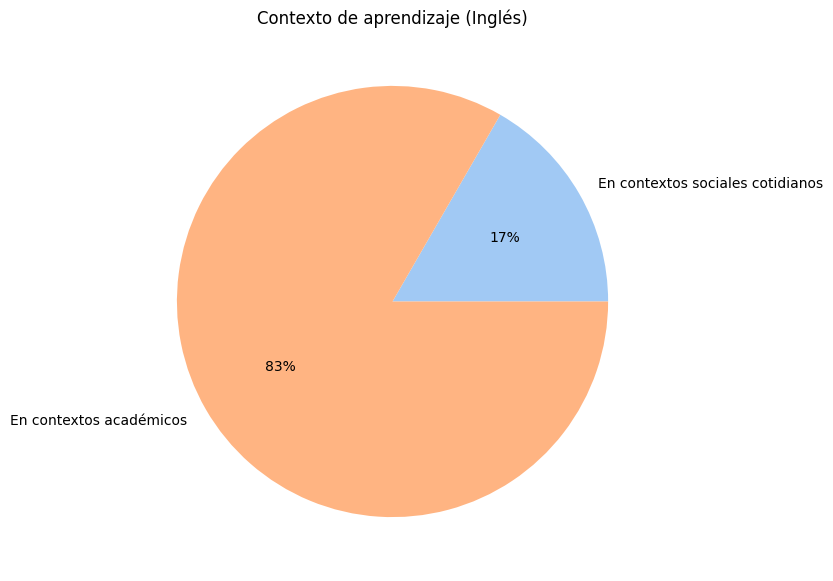

In [177]:
# Contextos de aprendizaje
fig, ax = plt.subplots(figsize=(7, 7))
tam = set(data["Su principal exposición al inglés (de forma escrita, verbal o auditiva) ha sido:"])
n = [list(data["Su principal exposición al inglés (de forma escrita, verbal o auditiva) ha sido:"]).count(i) for i in tam]
labels = [i for i in tam]
plt.pie(n, labels=labels, autopct="%.0f%%", colors=sns.color_palette("pastel"))

plt.title("Contexto de aprendizaje (Inglés)")

plt.show()

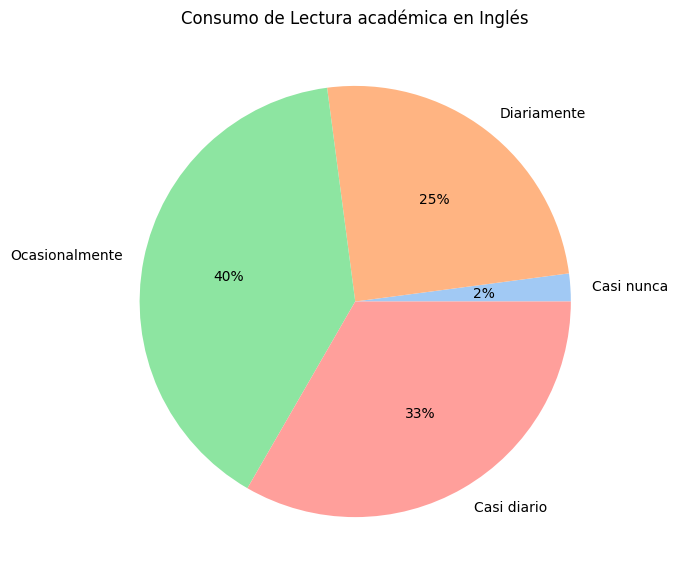

In [178]:
fig, ax = plt.subplots(figsize=(7, 7))
tam = set(data["Indique la frecuencia con la que consume contenido principalmente en el idioma INGLÉS. [Lectura académica]"])
n = [list(data["Indique la frecuencia con la que consume contenido principalmente en el idioma INGLÉS. [Lectura académica]"]).count(i) for i in tam]
labels = [i for i in tam]
plt.pie(n, labels=labels, autopct="%.0f%%", colors=sns.color_palette("pastel"))

plt.title("Consumo de Lectura académica en Inglés")

plt.show()

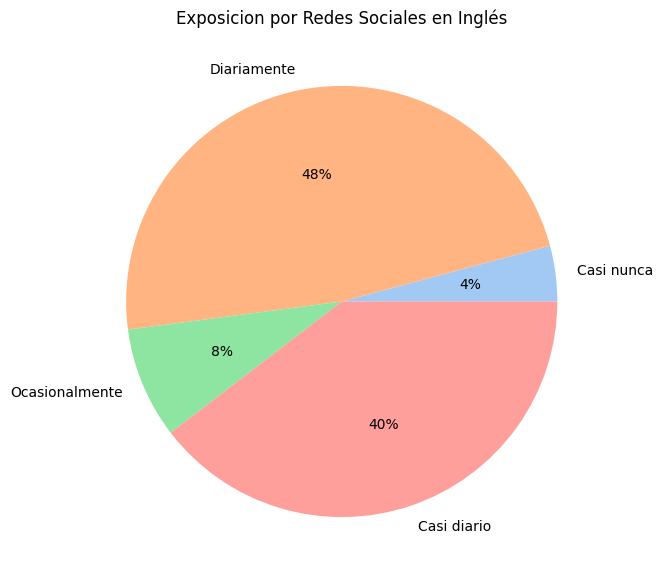

In [179]:
fig, ax = plt.subplots(figsize=(7, 7))
tam = set(data["Indique la frecuencia con la que consume contenido principalmente en el idioma INGLÉS. [Redes sociales (Facebook, Instagram, TikTok, X, Podcast)]"])
n = [list(data["Indique la frecuencia con la que consume contenido principalmente en el idioma INGLÉS. [Redes sociales (Facebook, Instagram, TikTok, X, Podcast)]"]).count(i) for i in tam]
labels = [i for i in tam]
plt.pie(n, labels=labels, autopct="%.0f%%", colors=sns.color_palette("pastel"))

plt.title("Exposicion por Redes Sociales en Inglés")

plt.show()

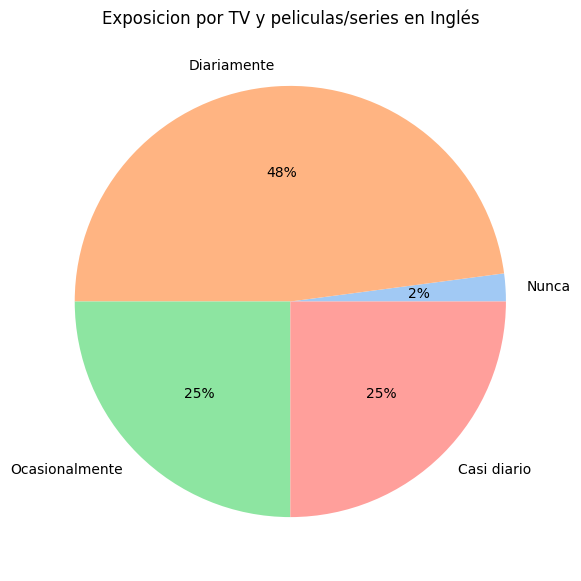

In [180]:
fig, ax = plt.subplots(figsize=(7, 7))
tam = set(data["Indique la frecuencia con la que consume contenido principalmente en el idioma INGLÉS. [Series de TV o películas]"])
n = [list(data["Indique la frecuencia con la que consume contenido principalmente en el idioma INGLÉS. [Series de TV o películas]"]).count(i) for i in tam]
labels = [i for i in tam]
plt.pie(n, labels=labels, autopct="%.0f%%", colors=sns.color_palette("pastel"))

plt.title("Exposicion por TV y peliculas/series en Inglés")

plt.show()

<Axes: >

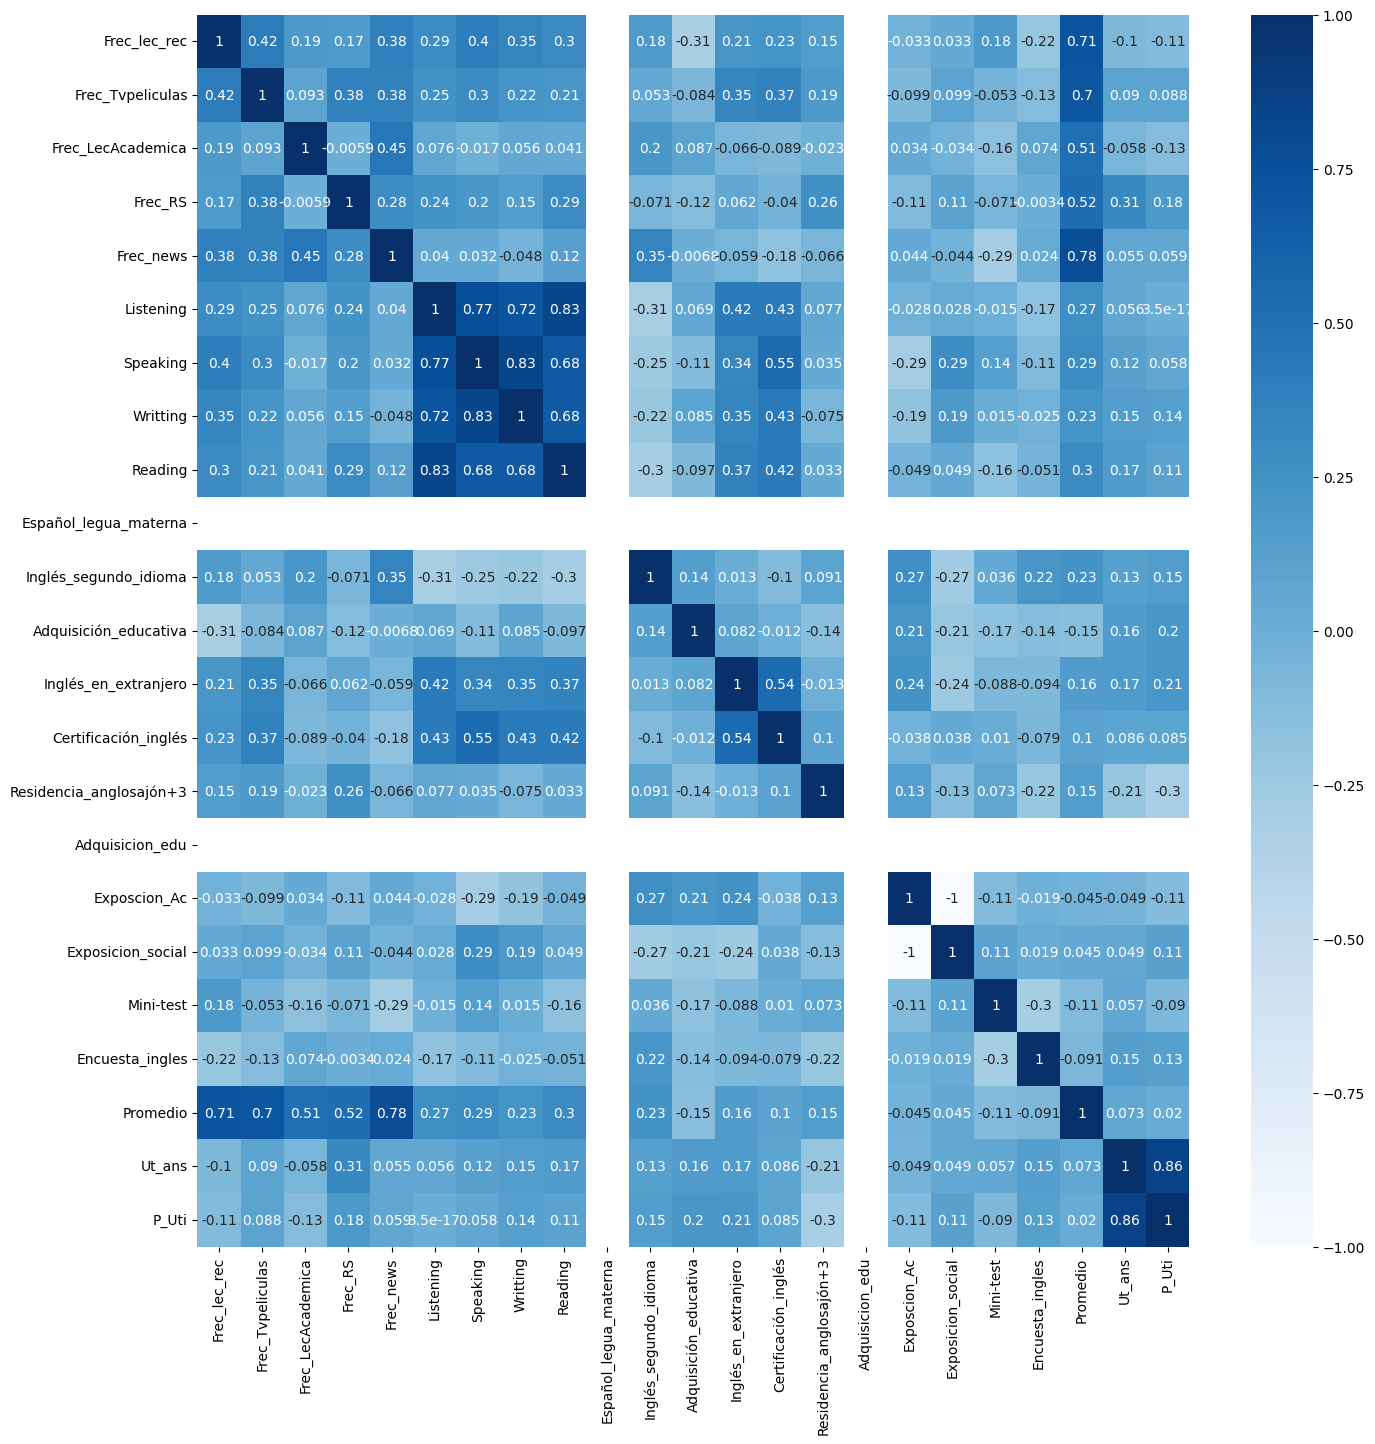

In [182]:
df = df.rename(columns={'Su adquisición del segundo idioma es o fue: _Dentro de un entorno educativo':"Adquisicion_edu",
                        'Su principal exposición al inglés (de forma escrita, verbal o auditiva) ha sido:_En contextos académicos':"Exposcion_Ac",
                        'Su principal exposición al inglés (de forma escrita, verbal o auditiva) ha sido:_En contextos sociales cotidianos':"Exposicion_social"})
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(df.dropna(axis=1).corr(), annot=True, cmap="Blues")

# Diferencia entre los grupos

## Por dilema

In [183]:
a, b = [], []

for i in ["ing_hab", "ing_crying_baby", "ing_sophie", "ing_infiel", "ing_delatar"]:
    a.append(list(df[i]).count(True))
for i in ["esp_hab", "esp_crying_baby", "esp_sophie", "esp_infiel", "esp_delatar"]:
    b.append(list(df[i]).count(True))
chidict = {"Tren":[a[0], b[0]], "Bebe llorando":[a[1], b[1]], "sophie":[a[2], b[2]], "Amigo infiel":[a[3], b[3]], "Delatar amigo":[a[4], b[4]]}
print(chidict)

{'Tren': [25, 19], 'Bebe llorando': [17, 7], 'sophie': [19, 9], 'Amigo infiel': [7, 3], 'Delatar amigo': [12, 9]}


In [184]:
from scipy.stats import chisquare

for i in chidict.keys():
    print(f"{i}\nx^2:\t\t{chisquare([chidict[i][0], chidict[i][1]])[0]}\np-value:\t{chisquare([chidict[i][0], chidict[i][1]])[1]}")

Tren
x^2:		0.8181818181818182
p-value:	0.36571229628151314
Bebe llorando
x^2:		4.166666666666667
p-value:	0.041226833337163815
sophie
x^2:		3.5714285714285716
p-value:	0.05878172135535891
Amigo infiel
x^2:		1.6
p-value:	0.20590321073206466
Delatar amigo
x^2:		0.42857142857142855
p-value:	0.5126907602619235


> ☝️🤓: Solo los dilemas de alto conflicto muestran diferencias significativas segun el idioma en el que son presentados.

# Modelo Regresion Lineal

In [ ]:
# DROPEA NaN 
ingdf = ingdf.dropna(axis=1)
espdf = espdf.dropna(axis=1)

## Respuesta utilitaria por dilema

In [186]:
for i in ['ing_hab', 'ing_crying_baby', 'ing_sophie', 'ing_infiel', 'ing_delatar']:
    ingdf[i] = ingdf[i].astype(bool)
for i in ['esp_hab', 'esp_crying_baby', 'esp_sophie', 'esp_infiel', 'esp_delatar']:
    espdf[i] = espdf[i].astype(bool)

<ipython-input-186-6481c03b46f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ingdf[i] = ingdf[i].astype(bool)
<ipython-input-186-6481c03b46f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ingdf[i] = ingdf[i].astype(bool)
<ipython-input-186-6481c03b46f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [187]:
dilemas = ['ing_hab', 'ing_crying_baby', 'ing_sophie', 'ing_infiel', 'ing_delatar']
for i in dilemas:
    X = ingdf.drop(['Su adquisición del segundo idioma es o fue: _Dentro de un entorno educativo',
        'Su principal exposición al inglés (de forma escrita, verbal o auditiva) ha sido:_En contextos académicos',
        'Encuesta_ingles', 'Promedio', 'Ut_ans', 'P_Uti'], axis=1)
    y = ingdf[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    print(f"{i}\t{accuracy_score(y_test, predict)}")
    print(f"{classification_report(y_test, predict)}")
    print(confusion_matrix(y_test, predict))


ing_hab	0.8333333333333334
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         1
        True       0.83      1.00      0.91         5

    accuracy                           0.83         6
   macro avg       0.42      0.50      0.45         6
weighted avg       0.69      0.83      0.76         6

[[0 1]
 [0 5]]
ing_crying_baby	1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00         4
        True       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

[[4 0]
 [0 2]]
ing_sophie	0.6666666666666666
              precision    recall  f1-score   support

       False       1.00      0.33      0.50         3
        True       0.60      1.00      0.75         3

    accuracy                           0.67         6
   macro avg       0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

              precision    recall  f1-score   support

       False       0.67      1.00      0.80         4
        True       0.00      0.00      0.00         2

    accuracy                           0.67         6
   macro avg       0.33      0.50      0.40         6
weighted avg       0.44      0.67      0.53         6

[[4 0]
 [2 0]]
ing_delatar	0.8333333333333334
              precision    recall  f1-score   support

       False       0.67      1.00      0.80         2
        True       1.00      0.75      0.86         4

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6

[[2 0]
 [1 3]]


## Respuestas utilitarias por persona

{0.5}
              precision    recall  f1-score   support

           0       0.40      1.00      0.57         2
           1       1.00      0.25      0.40         4

    accuracy                           0.50         6
   macro avg       0.70      0.62      0.49         6
weighted avg       0.80      0.50      0.46         6



<Axes: >

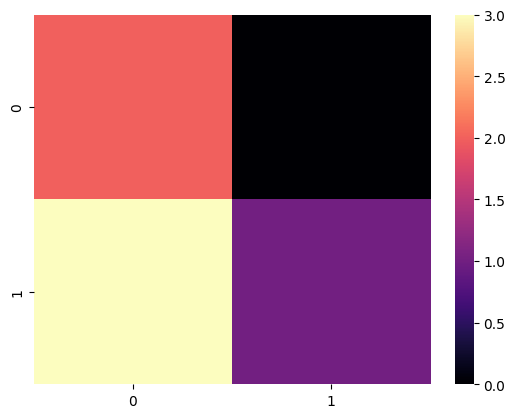

In [188]:
dilemas = ['ing_hab', 'ing_crying_baby', 'ing_sophie', 'ing_infiel', 'ing_delatar',
        'Su adquisición del segundo idioma es o fue: _Dentro de un entorno educativo',
        'Su principal exposición al inglés (de forma escrita, verbal o auditiva) ha sido:_En contextos académicos',
        'Encuesta_ingles', 'Promedio', 'Ut_ans', 'P_Uti']
X = ingdf.drop(dilemas, axis=1)
y = ingdf["P_Uti"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=237)
model = LogisticRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)

print({accuracy_score(y_test, predict)})
print(classification_report(y_test, predict))
#;print(confusion_matrix(y_test, predict))
sns.heatmap(confusion_matrix(y_test, predict), cmap="magma")

In [ ]:
# Grafica
coef = model.coef_[0]
dic = {}
for i in range(len(coef)):
    dic[ingdf.drop(dilemas, axis=1).columns[i]] = [coef[i], model.intercept_[0]]


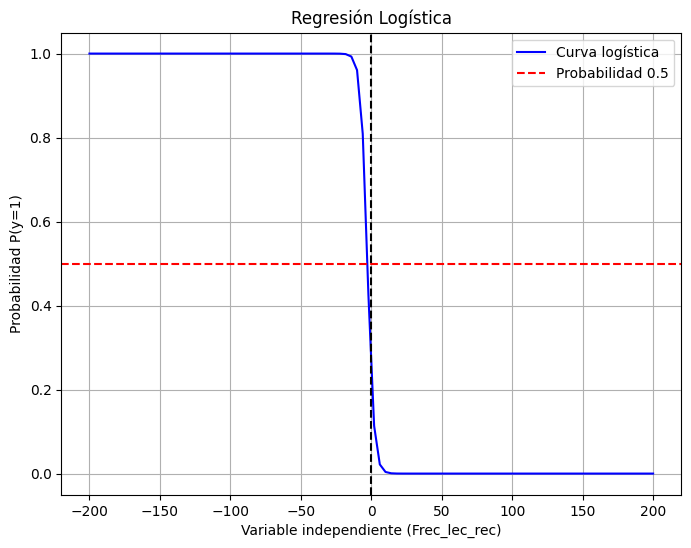

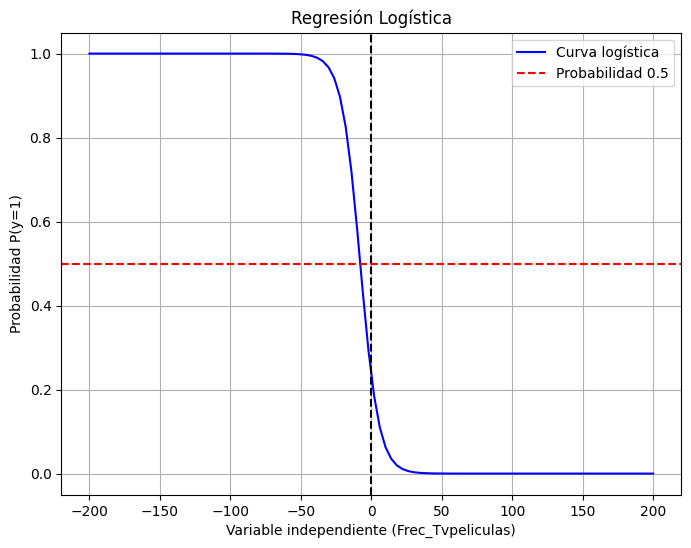

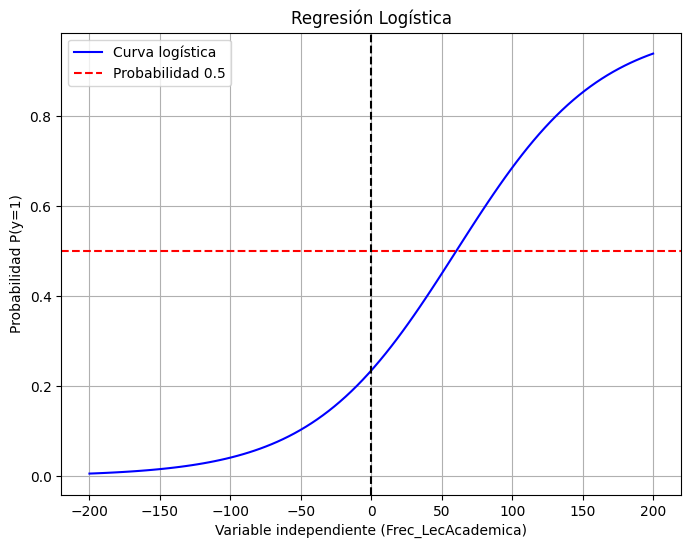

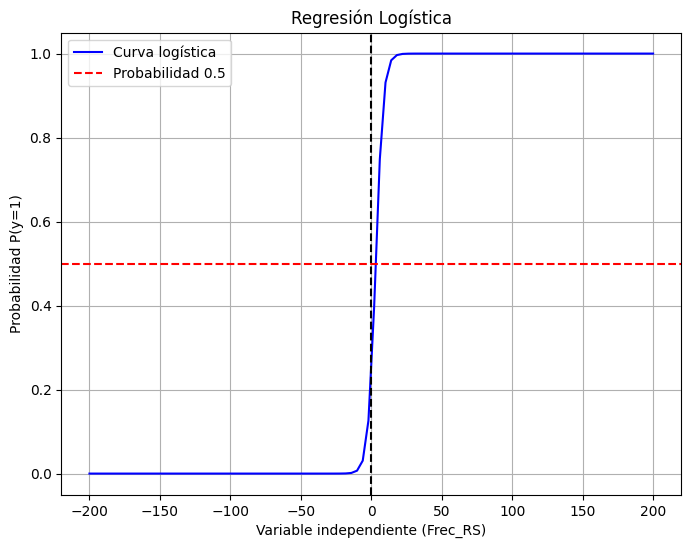

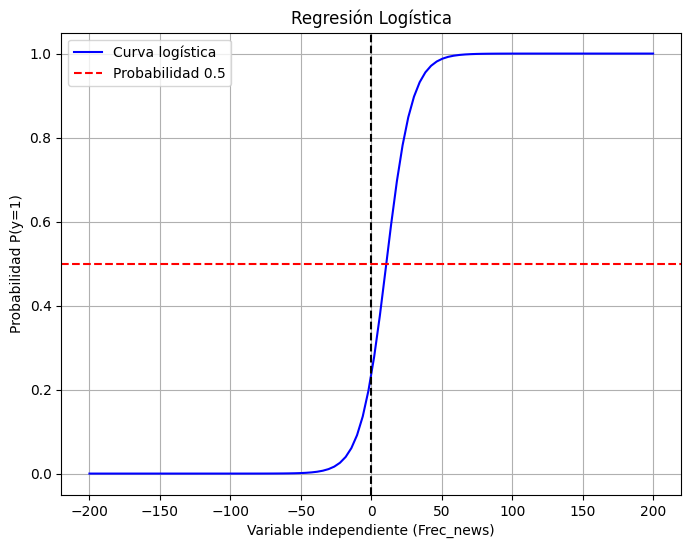

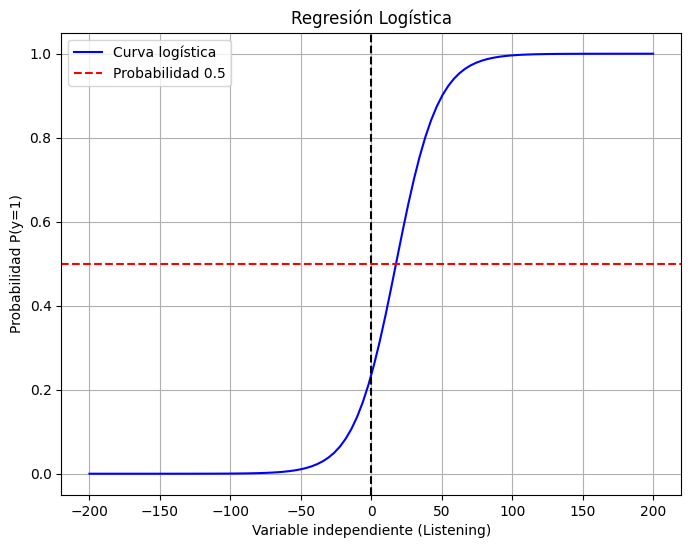

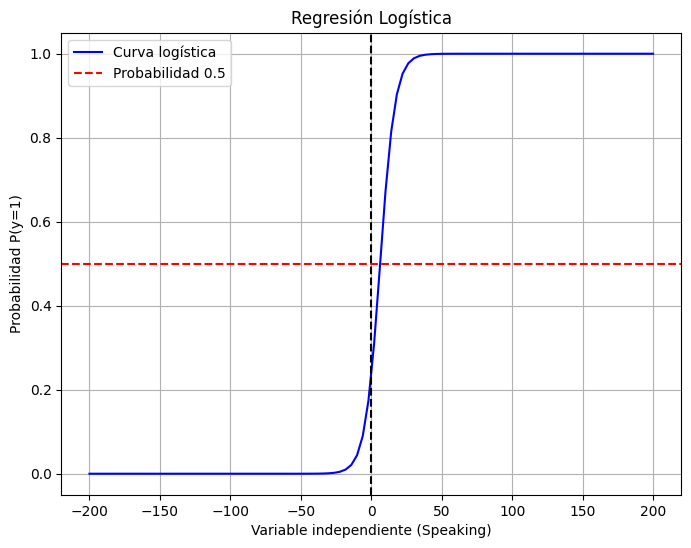

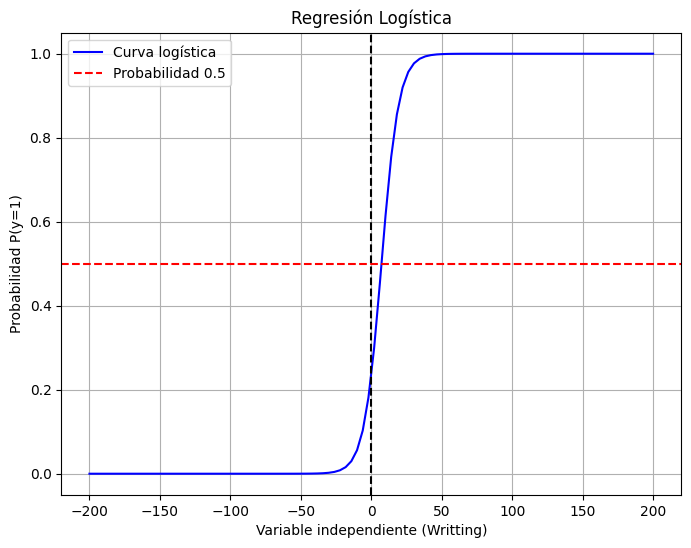

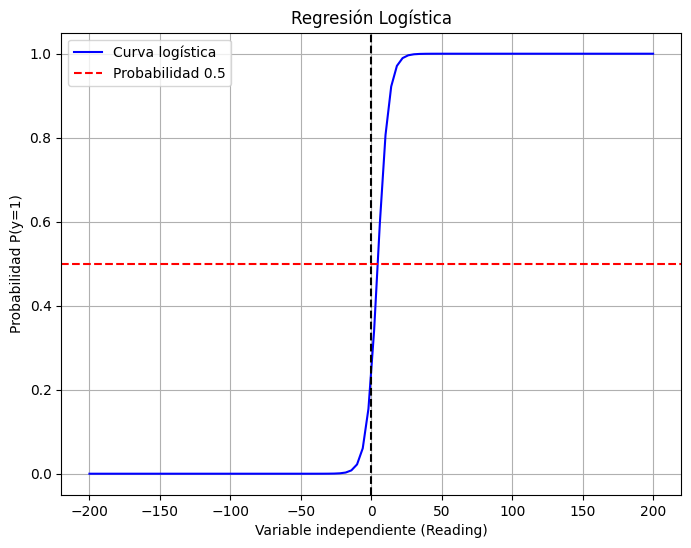

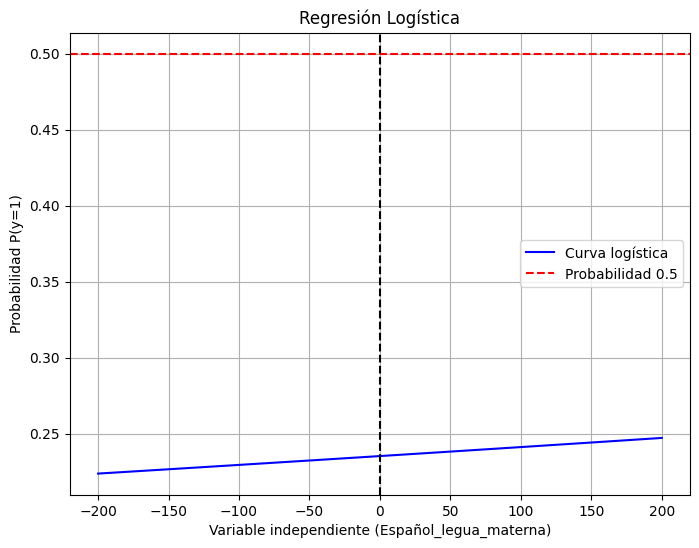

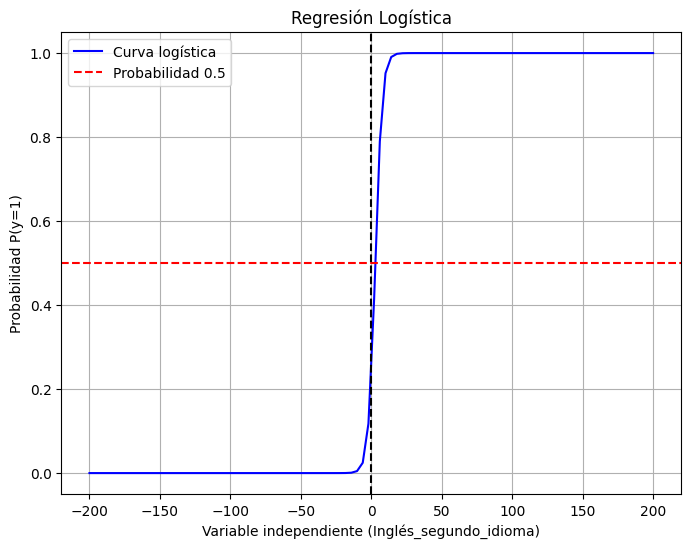

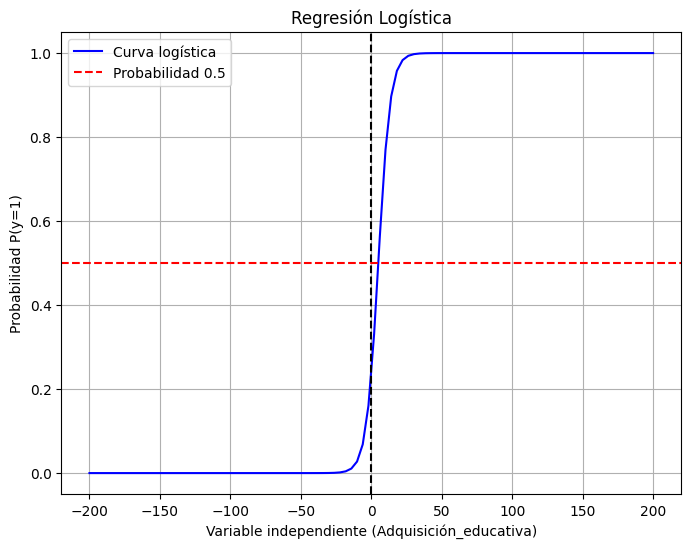

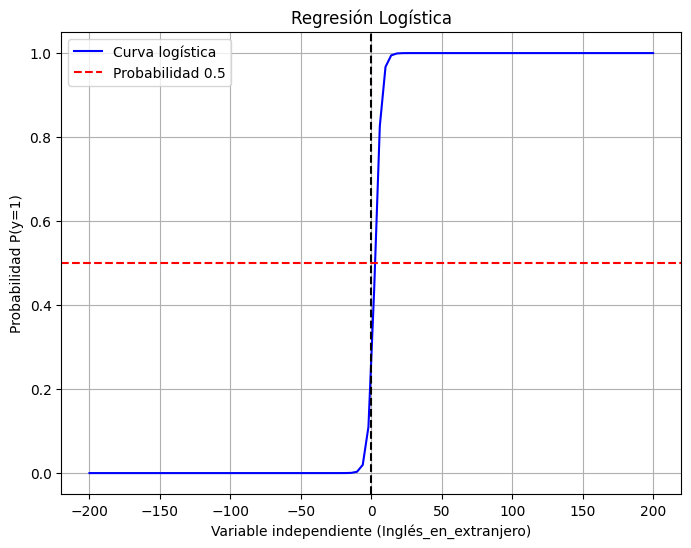

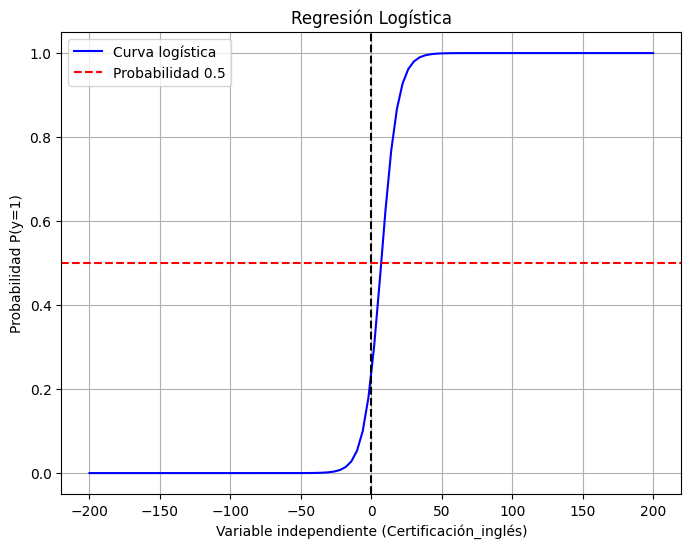

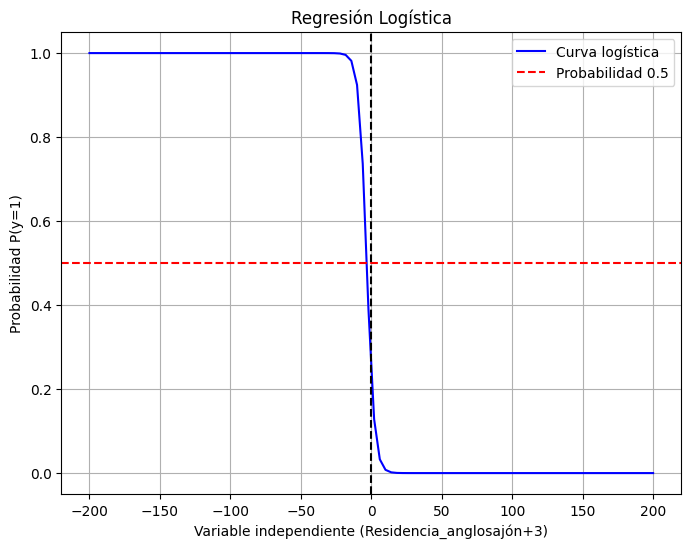

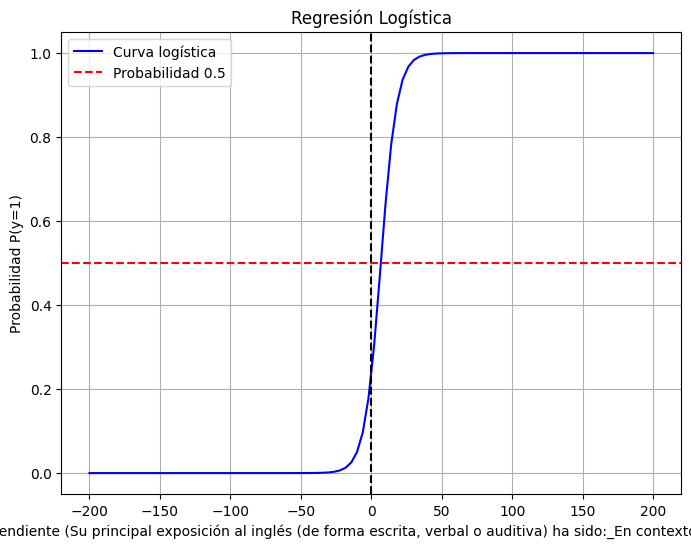

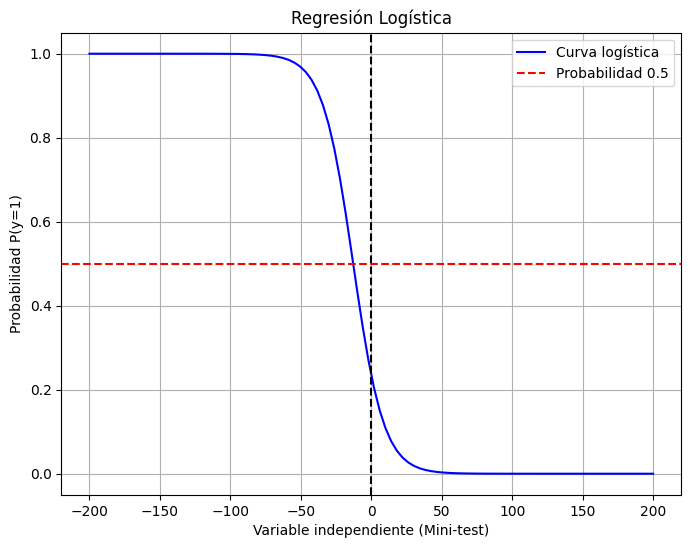

In [190]:
x = np.linspace(-200, 200, 100)
for i in dic.keys():
    coeficiente = dic[i][0]
    intercepto = dic[i][1]
    logit = intercepto + coeficiente * x

    p = 1 / (1 + np.exp(-logit))

    plt.figure(figsize=(8, 6))
    plt.plot(x, p, label="Curva logística", color="blue")

    plt.title("Regresión Logística")
    plt.xlabel(f"Variable independiente ({i})")
    plt.ylabel("Probabilidad P(y=1)")
    plt.axhline(0.5, color="red", linestyle="--", label="Probabilidad 0.5")
    plt.axvline(0, color="black", linestyle="--")
    plt.legend()
    plt.grid(True)
plt.show()


<ipython-input-191-3891b82d6a92>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  logit = interceptos[i] + coeficientes[i] * x


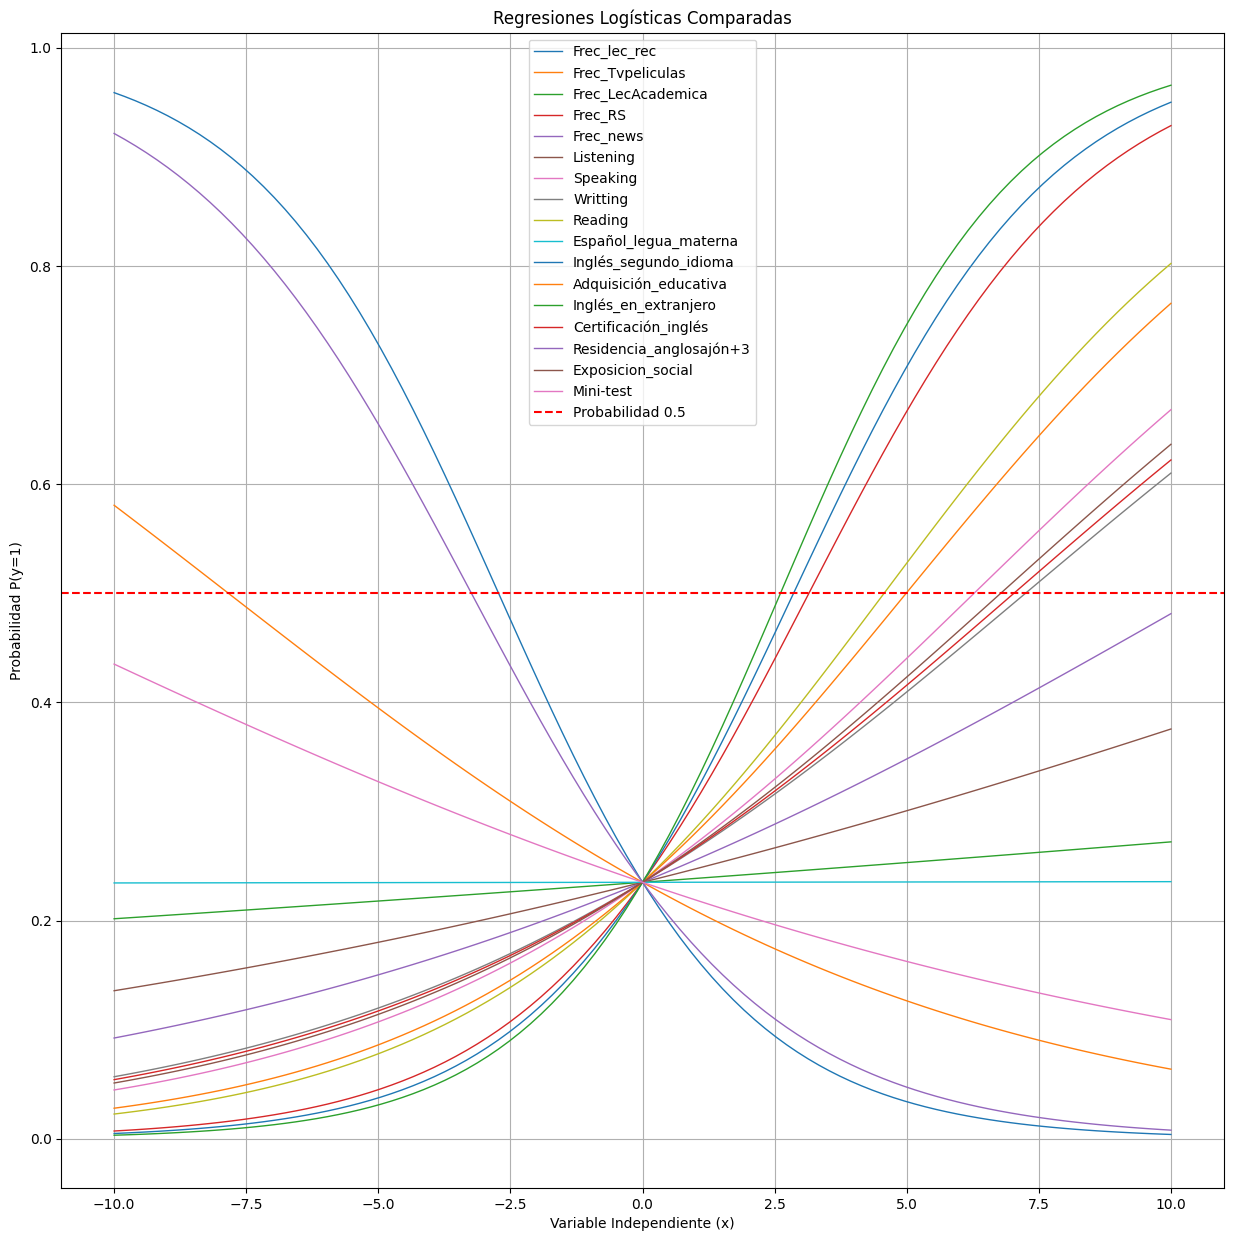

In [ ]:
# Grafica multidimensional
LRdf = LRdf.rename(columns={'Su adquisición del segundo idioma es o fue: _Dentro de un entorno educativo':"Adquisicion_edu",
                        'Su principal exposición al inglés (de forma escrita, verbal o auditiva) ha sido:_En contextos académicos':"Exposcion_Ac",
                        'Su principal exposición al inglés (de forma escrita, verbal o auditiva) ha sido:_En contextos sociales cotidianos':"Exposicion_social"})

coeficientes = LRdf.transpose()[0]
interceptos = LRdf.transpose()[1]

x = np.linspace(-10, 10, 100)

plt.figure(figsize=(15, 15))

for i in range(len(LRdf.columns)):
    logit = interceptos[i] + coeficientes[i] * x
    p = 1 / (1 + np.exp(-logit))

    plt.plot(x, p, label=f'{LRdf.columns[i]}', linewidth=1)

plt.title('Regresiones Logísticas Comparadas')
plt.xlabel('Variable Independiente (x)')
plt.ylabel('Probabilidad P(y=1)')

plt.axhline(0.5, color='red', linestyle='--', label='Probabilidad 0.5')

plt.legend()

plt.grid(True)
plt.show()


> ☝️🤓: Valores cercanos a 0 en el intercepto ($\beta_0$) implican poca preferencia del modelo, es decir menos sesgo.
Valores cercanos a 0 en los coeficientes ($\beta_1$) de cada variable X indican poca influencia sobre la variable resouesta.

### Reg logistica espanol

> ☝️🤓: Modelo sobreajustado porque los hablantes nativos presentan menos respuestas utilitarias, y estas no se ven afectadas por el doominio/exposicion de ingles.

In [ ]:
''' dilemas = ['esp_hab', 'esp_crying_baby', 'esp_sophie', 'esp_infiel', 'esp_delatar']
X = espdf.drop(dilemas, axis=1)
y = espdf["P_Uti"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LogisticRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)
print({accuracy_score(y_test, predict)})
print(classification_report(y_test, predict))
sns.heatmap(confusion_matrix(y_test, predict), cmap="Blues") '''

' dilemas = [\'esp_hab\', \'esp_crying_baby\', \'esp_sophie\', \'esp_infiel\', \'esp_delatar\']\nX = espdf.drop(dilemas, axis=1)\ny = espdf["P_Uti"]\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)\nmodel = LogisticRegression()\nmodel.fit(X_train, y_train)\npredict = model.predict(X_test)\n# Modelo sobreajustado porque los hablantes nativos presentan menos respuestas utilitarias, y estas no se ven afectadas por el doominio/exposicion de ingles.\nprint({accuracy_score(y_test, predict)})\nprint(classification_report(y_test, predict))\nsns.heatmap(confusion_matrix(y_test, predict), cmap="Blues") '